In [1]:
import sys,os
dropbox_fld = r'C:\Users\Bogdan\Dropbox'
google_fld = r'I:\My Drive\RotationScriptsBA\LibraryDesign3'
sys.path.append(google_fld)

import LibraryDesigner as ld
import LibraryTools as lt
from seqint import seq2Int, seq2Int_rc
# some other packages may required
import Bio #use pip install biopython

In [2]:
#!pyensembl install --release 104 --species mus_musculus

# Desing probes for intron sequence of Ptbp1, intron sequence for Ptbp2 and mRNA of Ptbp2

### Plot the plasmid

In [183]:
for feat in record.features:
    if 'label' in feat.qualifiers:
        if feat.qualifiers['label'][0]=='tdTomato':
            print(feat.type,feat.qualifiers['label'])
            print(feat.location)

CDS ['tdTomato']
type: CDS
location: [3902:5333](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: label, Value: ['tdTomato']
    Key: note, Value: ['mammalian codon-optimized']
    Key: product, Value: ['tandem dimeric (pseudo-monomeric) derivative of DsRed (Shaner et al., 2004)']
    Key: translation, Value: ['MVSKGEEVIKEFMRFKVRMEGSMNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYKKLSFPEGFKWERVMNFEDGGLVTVTQDSSLQDGTLIYKVKMRGTNFPPDGPVMQKKTMGWEASTERLYPRDGVLKGEIHQALKLKDGGHYLVEFKTIYMAKKPVQLPGYYYVDTKLDITSHNEDYTIVEQYERSEGRHHLFLGHGTGSTGSGSSGTASSEDNNMAVIKEFMRFKVRMEGSMNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYKKLSFPEGFKWERVMNFEDGGLVTVTQDSSLQDGTLIYKVKMRGTNFPPDGPVMQKKTMGWEASTERLYPRDGVLKGEIHQALKLKDGGHYLVEFKTIYMAKKPVQLPGYYYVDTKLDITSHNEDYTIVEQYERSEGRHHLFLYGMDELYK']



In [190]:
seq_tdTom = str(record.seq[3902:5333])
lt.fastawrite('Ai14_tdTomato.fasta',['Ai14_tdTomato'],[seq_tdTom])

In [192]:
nms_pbs,seqs_pbs = zip(*[ln.split('\t')for ln in """Td_tom_pb_001	CCTTGAAGCGCATGAACTCTTTGATGACCTATTGATAGACGATCCAGACG
Td_tom_pb_002	GCACCTTGAAGCGCATGAACTCTTTGATGAGAACGCCAACGAGGATTGAT
Td_tom_pb_003	TTCATGGAGCCCTCCATGCGCACCTTGAAGATTGATAGACGATCCAGACG
Td_tom_pb_004	GTTCATGGAGCCCTCCATGCGCACCTTGAAGAACGCCAACGAGGATTGAT
Td_tom_pb_005	GCCCTTGGTCACCTTCAGCTTGGCGGTCTGATTGATAGACGATCCAGACG
Td_tom_pb_006	TACATGAACTGGGGGGACAGGATGTCCCAGGAACGCCAACGAGGATTGAT
Td_tom_pb_007	GGGGAAGGACAGCTTCTTGTAATCGGGGATATTGATAGACGATCCAGACG
Td_tom_pb_008	TCGAAGTTCATCACGCGCTCCCACTTGAAGGAACGCCAACGAGGATTGAT
Td_tom_pb_009	ACGGTCACCAGACCGCCGTCCTCGAAGTTCATTGATAGACGATCCAGACG
Td_tom_pb_010	TTCACCTTGTAGATCAGCGTGCCGTCCTGCGAACGCCAACGAGGATTGAT
Td_tom_pb_011	CTCCCAGCCCATGGTCTTCTTCTGCATTACATTGATAGACGATCCAGACG
Td_tom_pb_012	TCCTTCAGCTTCAGGGCCTGGTGGATCTCGGAACGCCAACGAGGATTGAT
Td_tom_pb_013	TAGATGGTCTTGAACTCCACCAGGTAGTGGATTGATAGACGATCCAGACG
Td_tom_pb_014	AGTTGCACGGGCTTCTTGGCCATGTAGATGGAACGCCAACGAGGATTGAT
Td_tom_pb_015	GGAGCGCTCGTACTGTTCCACGATGGTGTAATTGATAGACGATCCAGACG
Td_tom_pb_016	ATGCCCCAGGAACAGGTGGTGGCGGCCCTCGAACGCCAACGAGGATTGAT
Td_tom_pb_017	CTGCCGGTGCTGCCGGTGCCATGCCCCAGGATTGATAGACGATCCAGACG
Td_tom_pb_018	TCTTTGATGACGGCCATGTTGTTGTCCTCGGAACGCCAACGAGGATTGAT
Td_tom_pb_019	TTGTACAGCTCGTCCATGCCGTACAGGAACATTGATAGACGATCCAGACG""".split('\n')])



In [196]:
[lt.seqrc(sq[:30]) in seq_tdTom for sq in seqs_pbs]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [5]:
!pip install git+https://github.com/ponnhide/plasmidviewer.git

  Cloning https://github.com/ponnhide/plasmidviewer.git to c:\users\bogdan\appdata\local\temp\pip-req-build-k484tu6i
  Resolved https://github.com/ponnhide/plasmidviewer.git to commit 8e00d04a42c333700607b3a06952c12e493b600e
  Created wheel for plasmidviewer: filename=plasmidviewer-0.0.0-py3-none-any.whl size=20710 sha256=e45f2ef7e1ae3804f0976325bbd0b27da3d64b3efc20becd2f6c4e775d7bc3cc
  Stored in directory: C:\Users\Bogdan\AppData\Local\Temp\pip-ephem-wheel-cache-kguuuymj\wheels\54\b5\3d\6096994f9802b95ecbc999840db659a877c49f27b500fa7723
Successfully built plasmidviewer


  Running command git clone -q https://github.com/ponnhide/plasmidviewer.git 'C:\Users\Bogdan\AppData\Local\Temp\pip-req-build-k484tu6i'


In [14]:
??SeqIO.read

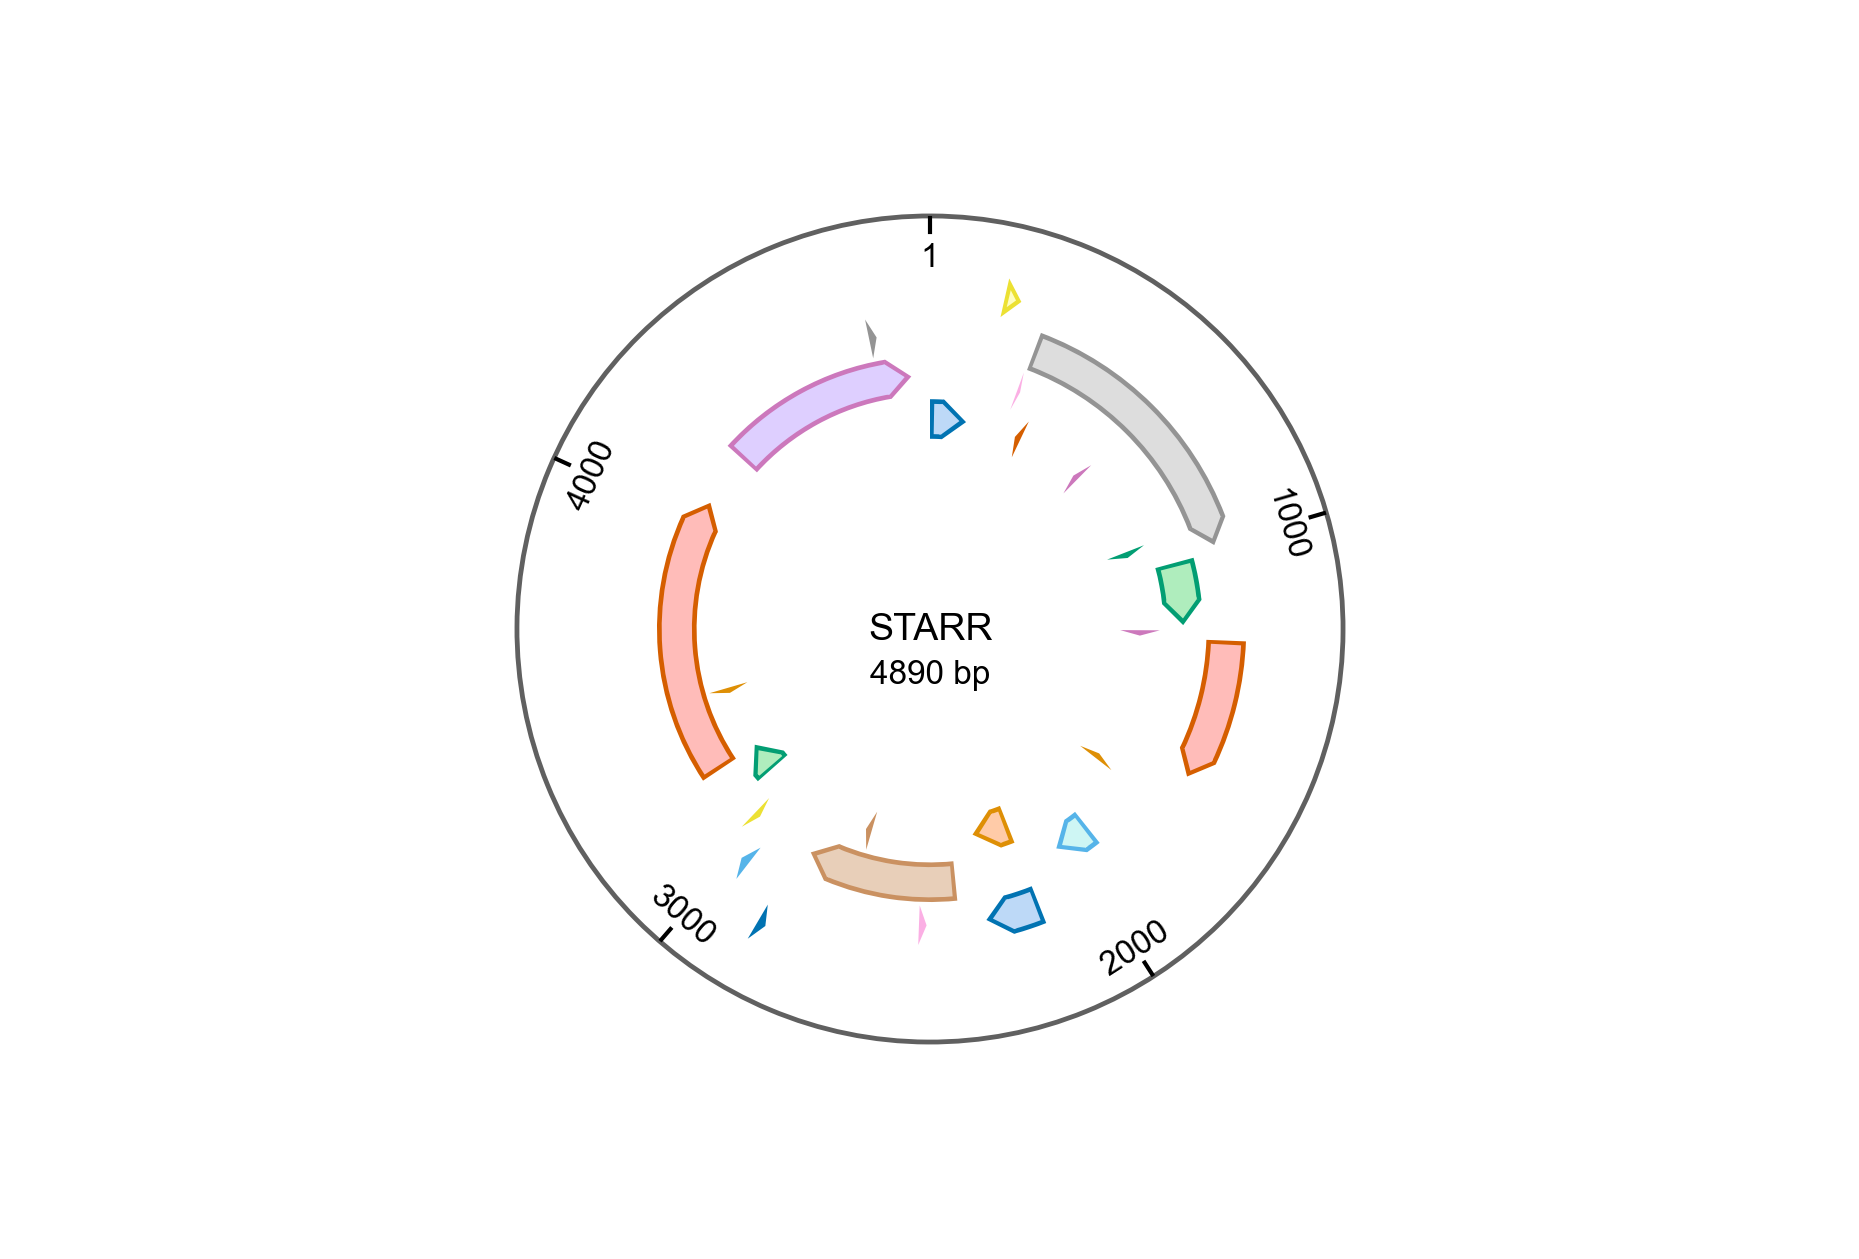

In [15]:
import plasmidviewer as pv
from Bio import SeqIO
record = SeqIO.read("STARR-FISH complete vector.gbk", format="genbank") 
feats  = []
facecolors  = []
edgecolors  = []
labelcolors = [] 
for feat in record.features:
    if feat.type == "source" or feat.type == "primer_bind":
        pass 
    else:
        feats.append(feat)  
        if feat.type == "CDS" and feat.strand >= 0:
            facecolors.append("#FFDFDF")
            edgecolors.append("#EE0000") 
            labelcolors.append("#DD0000") 

        elif feat.type == "CDS" and feat.strand == -1:
            facecolors.append("#DFDFFF")
            edgecolors.append("#0000EE") 
            labelcolors.append("#0000DD") 
        else:
            edgecolors.append(None)
            labelcolors.append(None)
            facecolors.append(None)
            
import matplotlib.pylab as plt
fig = plt.figure(dpi=300)
fig, ax = pv.visualize(record, feature_list=feats, title="STARR",fig=fig)

In [19]:
YFP = str(record[280-1:996].seq)
print(YFP)

ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGCTGATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGGGCTACGGCGTGCAGTGCTTCGCCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCACCGCCGACAAGCAGAAGAACGGCATCAAGGCCAACTTCAAGATCCGCCACAACATCGAGGACGGCGGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCTACCAGTCCAAGCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAG


In [20]:
lt.fastawrite('YFP.fasta',['YFP'],[YFP])

### Design probes

In [19]:
tr_folder = r'C:\Users\bbint\Dropbox\ChrisGlass_Project\mm10_transcriptome'
tr_file = tr_folder +os.sep+'mouse_GRCm39_genesUnspliced.fasta'

In [214]:
if not os.path.exists(tr_folder+r'/names_transcriptome.npy'):
    import sys,os,glob
    sys.path.append(os.path.abspath(r'LibraryDesign3'))
    import LibraryTools as lt
    import numpy as np
    import LibraryDesigner as ld
    import pickle
    from tqdm import tqdm

    def get_ints(sq,word = 12,verbose=True):
        ints = []
        if len(sq)>=word:
            sq_ = sq.encode()# encode to bytes
            iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
            for i in iters:
                ints.append(ld.seq2Int(sq_[i:i+word]))
        return ints


    transcript_file = tr_folder+r'/mouse_GRCm39_genesUnspliced.fasta'
    namesT,seqsT = lt.fastaread(transcript_file)

    from tqdm.notebook import tqdm
    intsT = [np.unique(get_ints(sq.upper(),verbose=False)) for sq in tqdm(seqsT)]


    pickle.dump(intsT,open(tr_folder+r'/mouse_GRCm39_genesUnspliced12bp.pkl','wb'))

    np.save(tr_folder+r'/names_transcriptome.npy',namesT)

  0%|          | 0/55416 [00:00<?, ?it/s]

In [31]:
import sys,os,glob
google_fld = r'G:\My Drive\RotationScriptsBA\LibraryDesign3'
sys.path.append(google_fld)
#sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm.notebook import tqdm

def get_ints(sq,word = 12,verbose=True):
    ints = []
    if len(sq)>=word:
        sq_ = sq.encode()# encode to bytes
        iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
        for i in iters:
            ints.append(ld.seq2Int(sq_[i:i+word]))
    return ints
def result_file(in_files,word=12,top_hits=500,tr_folder = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10_transcriptome'):
    """
    writes results of homology to file replacing each filename .fasta -> _isoResults.results
    This file contains names of sequences with high homology, pvalue assuming Bernoulli, 
    fraction of orginal transcript homology, fraction of target trancript homology
    """
    if True:#try:
        import sys,os,glob
        sys.path.append(os.path.abspath(r'LibraryDesign3'))
        import LibraryTools as lt
        import numpy as np
        import LibraryDesigner as ld
        import pickle
        from tqdm.notebook import tqdm
        def get_ints(sq,word = 12,verbose=True):
            ints = []
            if len(sq)>=word:
                sq_ = sq.encode()# encode to bytes
                iters = tqdm(range(len(sq_)-word+1)) if verbose else range(len(sq_)-word+1)
                for i in iters:
                    ints.append(ld.seq2Int(sq_[i:i+word]))
            return ints
        fl_ints = tr_folder+r'/mouse_GRCm39_genesUnspliced12bp.pkl'
        ints_tr  = pickle.load(open(fl_ints,'rb'))
        lens_tr = [len(int_) for int_ in ints_tr]
        names_tr = np.load(tr_folder+r'/names_transcriptome.npy')
        for fl in tqdm(in_files):
            fl_ = fl.replace('.fasta','_isoResults.results')
            if not os.path.exists(fl_):
                sq_T = lt.fastaread(fl)[-1][0]
                word=12
                lens_ = lens_tr
                ints__ = ints_tr
                names__ = names_tr
                intT = np.unique(get_ints(sq_T,word = word,verbose=False)[::word])
                CT = np.array([np.in1d(intT,int_,assume_unique=True) for int_ in tqdm(ints__)])
                logprand = np.log(np.sum(CT[:,:]))-np.log(np.sum(lens_))-np.log(CT.shape[-1])
                from scipy.stats import binomtest
                pvalues = []
                for itr in np.arange(len(CT)):
                    pvalue=1
                    if lens_[itr]>0:
                        try:
                            result = binomtest(np.sum(CT[itr]), n=lens_[itr], p=np.exp(logprand+np.log(CT.shape[-1])), alternative='greater')
                            pvalue = result.pvalue
                        except:
                            pass
                    pvalues.append(pvalue)
                ibest = np.argsort(np.log(pvalues))[:top_hits]
                result = [(names__[ib],pvalues[ib],np.mean(CT[ib]),np.sum(CT[ib])/lens_[ib]*word) for ib in ibest]
                text = '\n'.join([','.join([str(e) for e in ln]) for ln in result])

                fid = open(fl_,'w')
                fid.write(text)
                fid.close()
    else:#except:
        print('Failed')
        pass

In [57]:
fld_sv = r'Probes'
in_files = glob.glob(fld_sv+r'\*.fasta')
in_files = [fl for fl in in_files if 'auto' not in fl.lower()]
in_files

['Probes\\Ptbp2_full.fasta',
 'Probes\\Ptbp2_intron.fasta',
 'Probes\\Ai14_tdTomato.fasta',
 'Probes\\chr10_79855850-79856650.fasta',
 'Probes\\Ptbp1_intron.fasta',
 'Probes\\Ptbp2_mRNA.fasta']

In [58]:
#fld_sv = r'Probes'
#in_files = glob.glob(fld_sv+r'\*.fasta')
#in_files = [fl for fl in in_files if 'auto' not in fl.lower()]
result_file(in_files,word=12)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/55416 [00:00<?, ?it/s]

C:\Users\Bogdan\AppData\Local\Temp/ipykernel_30920/3216603051.py:67: RuntimeWarning: divide by zero encountered in log
  ibest = np.argsort(np.log(pvalues))[:top_hits]


In [37]:
names_top,seqs_top = lt.fastaread(r'C:\Users\Bogdan\Dropbox\BrainWideLibrary\top100genes_per_typeLinn.fasta')

In [38]:
tr_folder = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10_transcriptome'
transcript_file = tr_folder+r'/mouse_GRCm39_genesUnspliced.fasta'
names_tr,seqs_tr = lt.fastaread(transcript_file)


In [61]:
fls = glob.glob(r'Probes\*_isoResults.results')

In [62]:
names_tr_ = [nm.split('|')[2] for nm in names_tr] #simplified name
names_top_ = [nm.split('|')[2] for nm in names_top]
for fl in tqdm(fls):
    M = np.array([ln[:-1].split(',') for ln in open(fl,'r')])
    pval,fr1,fr2=M[:,1:].astype(np.float32).T
    names_ = M[:,0]
    names_ = np.array([nm.split('|')[2] for nm in names_])

    keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.5)
    if False: #np.sum(keep)>1:
        print(fl)
        print(list(zip(names_[keep],pval[keep],fr1[keep],fr2[keep])))
        print()
    fl_save = fl.replace('_isoResults.results','_AutoIso.fasta')
    inds_iso = [names_tr_.index(nm) for nm in names_[keep]]
    names_new = [names_tr_[itr] for itr in inds_iso]
    seqs_new = [seqs_tr[itr] for itr in inds_iso]
    lt.fastawrite(fl_save,names_new,seqs_new)

    inds_iso_top = [names_tr_.index(nm) for nm in names_[keep] if nm in names_top_]
    names_new = [names_tr_[itr] for itr in inds_iso_top]
    seqs_new = [seqs_tr[itr] for itr in inds_iso_top]
    lt.fastawrite(fl_save.replace('_AutoIso.fasta','_AutoIsoTop.fasta'),names_new,seqs_new)


  0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\Bogdan\AppData\Local\Temp/ipykernel_30920/323514508.py:9: RuntimeWarning: divide by zero encountered in log
  keep = (np.log(pval)<np.log(10**(-3)))&(fr1>0.5)


In [63]:
for fl in glob.glob(r'Probes\*_AutoIso.fasta'):
    names,seqs = lt.fastaread(fl)
    print(os.path.basename(fl),names)

chr10_79855850-79856650_AutoIso.fasta ['Ptbp1']
Ai14_tdTomato_AutoIso.fasta []
Ptbp2_full_AutoIso.fasta ['Ptbp2']
Ptbp1_intron_AutoIso.fasta ['Ptbp1']
Ptbp2_intron_AutoIso.fasta ['Ptbp2']
Ptbp2_mRNA_AutoIso.fasta ['Ptbp2']


### Design Probes

In [22]:
import sys,os,glob
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm import tqdm

In [23]:
in_files = glob.glob(r'C:\Users\Bogdan\Dropbox\Bing_viral_enhancers/YFP*.fasta')
in_files = [fl for fl in in_files if 'auto' not in fl.lower()]
in_files

['C:\\Users\\Bogdan\\Dropbox\\Bing_viral_enhancers\\YFP.fasta']

In [24]:
import LibraryDesigner as ld
import imp
imp.reload(ld)
in_file = str(in_files[0])
save_file = in_file.replace('.fasta','.pbr')
print(in_file)
transcriptome_fl = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10_transcriptome\mouse_GRCm39_genesUnspliced_17w.bin'
genome_fl = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10\allgenome_17w.bin'
rep_fl = r'C:\Users\Bogdan\Dropbox\ChrisGlass_Project\mm10\repetitive\repetitive.fasta'
top_transcriptome_fl =  r'C:\Users\Bogdan\Dropbox\BrainWideLibrary\top100genes_per_typeLinn.fasta'

iso_file_top = in_file.replace('.fasta','_AutoIsoTop.fasta')
iso_file = in_file.replace('.fasta','_AutoIso.fasta') 
for fl_ in [iso_file_top,iso_file]:
    if not os.path.exists(fl_):
        fid = open(fl_,'w')
        fid.close()

dic_check={('genome','local_genome'):150,
            ('transcriptome','local_transcript'):15,
            ('top_transcriptome','local_transcript_top'):4,
            'repetitive':3,'gc':[0.25,0.75],'tm':70}

pb_designer = ld.pb_reports_class(
    sequence_dic={'file':in_file,'use_revc':False,'use_kmer':True},
    map_dic={'transcriptome':{'file':transcriptome_fl,'use_revc':False,'use_kmer':True},
             'top_transcriptome':{'file':top_transcriptome_fl,'use_revc':False,'use_kmer':True},
             'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
          'repetitive':{'file':rep_fl,'use_revc':True,'use_kmer':True},
          'local_transcript':{'file':iso_file,'use_revc':False,'use_kmer':True},
            'local_transcript_top':{'file':iso_file_top,'use_revc':False,'use_kmer':True},
            'local_genome':{'file':in_file,'use_revc':False,'use_kmer':True}},
          #'local_genome':{'file':local_genome_fl,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=save_file,
    params_dic={'word_size':17,'pb_len':40,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False},
    dic_check=dic_check)

pb_designer.computeOTmaps()
pb_designer.compute_pb_report(verbose=True)
pb_designer.perform_check_end()
pb_designer.plots()
pb_designer.save_csv(name=os.path.basename(in_file).split('.')[0])

C:\Users\Bogdan\Dropbox\Bing_viral_enhancers\YFP.fasta
Setting attribute: map_transcriptome
Setting attribute: map_top_transcriptome
Mapping no. of seqs: 577
Setting attribute: map_genome
Setting attribute: map_repetitive
Mapping no. of seqs: 67029
Failed
Setting attribute: map_repetitive
Mapping no. of seqs: 67029
Setting attribute: map_local_transcript
Mapping no. of seqs: 0
Setting attribute: map_local_transcript_top
Mapping no. of seqs: 0
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Failed
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Time(s): 343.9247269630432
Dealing with sequence: 1 out of 1


100%|██████████████████████████████████████████████████████████████████████████████| 677/677 [00:00<00:00, 4763.26it/s]


Time(s): 1.3342108726501465
Picking non-overlaping sequences.
Time(s): 0.013011693954467773


In [29]:
pb_designer.params_dic = {'word_size':17,'pb_len':20,'buffer_len':0,'max_count':2**16-1,'check_on_go':False,'auto':False}
pb_designer.dic_check={('genome','local_genome'):150,
            ('transcriptome','local_transcript'):15,
            ('top_transcriptome','local_transcript_top'):4,
            'repetitive':3,'gc':[0.15,0.85],'tm':50}
pb_designer.save_file = in_file.replace('.fasta','_20bp.pbr')

pb_designer.load_sequence_file_and_paramaters()


#compute
pb_designer.compute_pb_report()
pb_designer.perform_check_end()
pb_designer.plots()
pb_designer.save_csv(name=os.path.basename(in_file).split('.')[0])

Dealing with sequence: 1 out of 1
Time(s): 0.10309362411499023
Picking non-overlaping sequences.
Time(s): 0.010008096694946289


In [ ]:
Acrbcm_39920-bcm39959,/5Acryd/agagcggcgggagtttacaaCCCTACCGGTGTACCGTTACCCCTACCGGTGTACCGTTAC,250nm,HPLC###
Acrbcm_39921-bcm39962,/5Acryd/cacgcaacggctaattctctCCGGTACGACTACTACTCAACCGGTACGACTACTACTCAA,250nm,HPLC
Acrbcm_39923-bcm39965,/5Acryd/atgtacataccgctcgattgAAACACCACGACGTAGTCTGAAACACCACGACGTAGTCTG,250nm,HPLC###
Acrbcm_39932-bcm39970,/5Acryd/aatgtctcatcgggaaagtgAAATTTTCGTTAGGCAGGGCAAATTTTCGTTAGGCAGGGC,250nm,HPLC
Acrbcm_39946-bcm39982,/5Acryd/atatctcccgtcgcataaacTAATGCGCTATTTCCGCCCCTAATGCGCTATTTCCGCCCC,250nm,HPLC
Acrbcm_39948-bcm39996,/5Acryd/catgttaacggccaatttcgAGCAGTTCCCGGATTACTGGAGCAGTTCCCGGATTACTGG,250nm,HPLC
bcm_39920,gtaacggtacaccggtagggTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC,25nm,STD
bcm_39921,ttgagtagtagtcgtaccggTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC,25nm,STD
bcm_39923,cagactacgtcgtggtgtttGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC,25nm,STD
bcm_39932,gccctgcctaacgaaaatttGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC,25nm,STD
bcm_39946,ggggcggaaatagcgcattaTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA,25nm,STD
bcm_39948,ccagtaatccgggaactgctTGCGAACTGTCCGGCTTTCATGCGAACTGTCCGGCTTTCA,25nm,STD

#NDB_815-2xStv_1rc	TTGCACGCAGCGATTGACGCGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC

In [30]:
### Finalize by adding readout sequences

In [31]:
def read_probes(fl):
    pb_fl = fl.replace('.fasta','.csv')
    names,seqs = [],[]
    if os.path.exists(pb_fl):
        seqs,names = zip(*[ln.replace("b'",'').replace("'",'').split(',')[:2] for ln in open(pb_fl,'r')])
    return names[1:],seqs[1:]

In [36]:
in_files = np.sort(glob.glob('YFP*.csv'))
in_files

array(['YFP.csv', 'YFP_20bp.csv'], dtype='<U12')

In [42]:
Rs = [lt.seqrc('agagcggcgggagtttacaa'),lt.seqrc('atgtacataccgctcgattg')]
nmRs= ['bcm39959','bcm39965']
names,seqs = read_probes(in_files[0])
R,nR = Rs[0],nmRs[0]
for inm,(nm,sq) in enumerate(zip(names,seqs)):
    print(str(inm+1).zfill(2)+'_'+nm.replace('_pb','_40pb')+'_'+nR+','+lt.seqrc(sq).upper()+R.lower()+',25nm,STD')
    
R,nR = Rs[1],nmRs[1]
for inm,(nm,sq) in enumerate(zip(names,seqs)):
    print(str(inm+1).zfill(2)+'_'+nm.replace('_pb','_40pb')+'_'+nR+','+lt.seqrc(sq).upper()+R.lower()+',25nm,STD')

01_YFP_40pb_0_bcm39959,GCACCACCCCGGTGAACAGCTCCTCGCCCTTGCTCACCATttgtaaactcccgccgctct,25nm,STD
02_YFP_40pb_40_bcm39959,TTGTGGCCGTTTACGTCGCCGTCCAGCTCGACCAGGATGGttgtaaactcccgccgctct,25nm,STD
03_YFP_40pb_94_bcm39959,AGGGTCAGCTTGCCGTAGGTGGCATCGCCCTCGCCCTCGCttgtaaactcccgccgctct,25nm,STD
04_YFP_40pb_134_bcm39959,CCAGGGCACGGGCAGCTTGCCGGTGGTGCAGATCAGCTTCttgtaaactcccgccgctct,25nm,STD
05_YFP_40pb_174_bcm39959,AGCACTGCACGCCGTAGCCCAGGGTGGTCACGAGGGTGGGttgtaaactcccgccgctct,25nm,STD
06_YFP_40pb_214_bcm39959,AAGAAGTCGTGCTGCTTCATGTGGTCGGGGTAGCGGGCGAttgtaaactcccgccgctct,25nm,STD
07_YFP_40pb_254_bcm39959,GGTGCGCTCCTGGACGTAGCCTTCGGGCATGGCGGACTTGttgtaaactcccgccgctct,25nm,STD
08_YFP_40pb_294_bcm39959,CGGCGCGGGTCTTGTAGTTGCCGTCGTCCTTGAAGAAGATttgtaaactcccgccgctct,25nm,STD
09_YFP_40pb_334_bcm39959,TCGATGCGGTTCACCAGGGTGTCGCCCTCGAACTTCACCTttgtaaactcccgccgctct,25nm,STD
10_YFP_40pb_374_bcm39959,CAGGATGTTGCCGTCCTCCTTGAAGTCGATGCCCTTCAGCttgtaaactcccgccgctct,25nm,STD
11_YFP_40pb_414_bcm39959,AGACGTTGTGGCTGTTGTAGTTGTACTCC

In [44]:
Rs = [lt.seqrc('agagcggcgggagtttacaa'),lt.seqrc('atgtacataccgctcgattg')]
nmRs= ['bcm39959','bcm39965']
names,seqs = read_probes(in_files[1])
for inm,(nm,sq) in enumerate(zip(names,seqs)):
    R,nR = Rs[inm%2],nmRs[inm%2]
    print(str(inm+1).zfill(2)+'_'+nm.replace('_pb','_20pb')+'_'+nR+','+lt.seqrc(sq).upper()+(R.lower())*2+',25nm,STD')


01_YFP_20pb_0_bcm39959,TCCTCGCCCTTGCTCACCATttgtaaactcccgccgctctttgtaaactcccgccgctct,25nm,STD
02_YFP_20pb_20_bcm39965,GCACCACCCCGGTGAACAGCcaatcgagcggtatgtacatcaatcgagcggtatgtacat,25nm,STD
03_YFP_20pb_40_bcm39959,GTCCAGCTCGACCAGGATGGttgtaaactcccgccgctctttgtaaactcccgccgctct,25nm,STD
04_YFP_20pb_60_bcm39965,TTGTGGCCGTTTACGTCGCCcaatcgagcggtatgtacatcaatcgagcggtatgtacat,25nm,STD
05_YFP_20pb_80_bcm39959,CCTCGCCGGACACGCTGAACttgtaaactcccgccgctctttgtaaactcccgccgctct,25nm,STD
06_YFP_20pb_100_bcm39965,GTAGGTGGCATCGCCCTCGCcaatcgagcggtatgtacatcaatcgagcggtatgtacat,25nm,STD
07_YFP_20pb_120_bcm39959,AGCTTCAGGGTCAGCTTGCCttgtaaactcccgccgctctttgtaaactcccgccgctct,25nm,STD
08_YFP_20pb_140_bcm39965,GCTTGCCGGTGGTGCAGATCcaatcgagcggtatgtacatcaatcgagcggtatgtacat,25nm,STD
09_YFP_20pb_160_bcm39959,GGTGGGCCAGGGCACGGGCAttgtaaactcccgccgctctttgtaaactcccgccgctct,25nm,STD
10_YFP_20pb_180_bcm39965,TAGCCCAGGGTGGTCACGAGcaatcgagcggtatgtacatcaatcgagcggtatgtacat,25nm,STD
11_YFP_20pb_200_bcm39959,GGGCGAAGCACTGCACGCCGttgtaaactcc

In [ ]:
T -> Acry_Adt -> Adt-R-2x -> Readout
T -> Acry_Adt -> Adt-A-4x -> Adt-R-4x -> Readout

In [58]:
lt.seqrc('agagcggcgggagtttacaaCCCTACCGGTGTACCGTTACCCCTACCGGTGTACCGTTAC'[:20])

'ttgtaaactcccgccgctct'

In [ ]:
Acry_Adt:
Acrbcm_39920-bcm39959,/5Acryd/agagcggcgggagtttacaaCCCTACCGGTGTACCGTTACCCCTACCGGTGTACCGTTAC,250nm,HPLC###
Acrbcm_39923-bcm39965,/5Acryd/atgtacataccgctcgattgAAACACCACGACGTAGTCTGAAACACCACGACGTAGTCTG,250nm,HPLC###

In [59]:
lt.seqrc('agagcggcgggagtttacaaCCCTACCGGTGTACCGTTACCCCTACCGGTGTACCGTTAC'[-20:])

'GTAACGGTACACCGGTAGGG'

In [60]:
lt.seqrc('gtaacggtacaccggtagggAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTG'[-20:])

'CACGCAACGGCTAATTCTCT'

In [62]:

Acry_Adts_nms = ['bcm39920','bcm39923']
Acry_Adts = ['agagcggcgggagtttacaaCCCTACCGGTGTACCGTTACCCCTACCGGTGTACCGTTAC','atgtacataccgctcgattgAAACACCACGACGTAGTCTGAAACACCACGACGTAGTCTG']
tails_nms1 = ['bcm39962','bcm39970']
tail_adts1 = ['cacgcaacggctaattctct','aatgtctcatcgggaaagtg']
#tails_nms2 = ['bcm39962','bcm39970']
#tail_adts2 = ['cacgcaacggctaattctct','aatgtctcatcgggaaagtg']
nm_Rf = ['_750','_Cy5']
Rf = ['TTTGCACTGCCGTCCTTGAC','GATCCGATTGGAACCGTCCC']
for adt_nm,adt,tail,tail_nm,R_,Rnm in zip(Acry_Adts_nms,Acry_Adts,tail_adts1,tails_nms1,Rf,nm_Rf):
    Adt_lv1 = lt.seqrc(adt[-20:]).lower()+lt.seqrc(tail).upper()*4
    Adt_lv2 = lt.seqrc(Adt_lv1[-20:]).lower()+R_.upper()*4
    print('lv1A_'+'_'.join([adt_nm,tail_nm])+','+Adt_lv1+',250nm,STD')
    print('lv2A_'+'_'.join([tail_nm,Rnm])+','+Adt_lv2+',250nm,STD')
    

lv1A_bcm39920_bcm39962,gtaacggtacaccggtagggAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTG,250nm,STD
lv2A_bcm39962__750,cacgcaacggctaattctctTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC,250nm,STD
lv1A_bcm39923_bcm39970,cagactacgtcgtggtgtttCACTTTCCCGATGAGACATTCACTTTCCCGATGAGACATTCACTTTCCCGATGAGACATTCACTTTCCCGATGAGACATT,250nm,STD
lv2A_bcm39970__Cy5,aatgtctcatcgggaaagtgGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC,250nm,STD


In [ ]:
bcm_39920,gtaacggtacaccggtagggTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC,25nm,STD
bcm_39921,ttgagtagtagtcgtaccggTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC,25nm,STD
bcm_39923,cagactacgtcgtggtgtttGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC,25nm,STD

In [ ]:
Acrbcm_39921-bcm39962,/5Acryd/cacgcaacggctaattctctCCGGTACGACTACTACTCAACCGGTACGACTACTACTCAA,250nm,HPLC
Acrbcm_39932-bcm39970,/5Acryd/aatgtctcatcgggaaagtgAAATTTTCGTTAGGCAGGGCAAATTTTCGTTAGGCAGGGC,250nm,HPLC
bcm_39921,ttgagtagtagtcgtaccggTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC,25nm,STD
bcm_39932,gccctgcctaacgaaaatttGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC,25nm,STD

In [37]:
sq_ = 'TTGCACGCAGCGATTGACGCGATCCGATTGGAACCGTCCCGATCCGATTGGAACCGTCCC'[:20].lower()+(lt.seqrc('atgtacataccgctcgattg')*2).upper()
print('NDB_815-bcm39965'+','+sq_+',25nm,STD')

NDB_815-bcm39965,ttgcacgcagcgattgacgcCAATCGAGCGGTATGTACATCAATCGAGCGGTATGTACAT,25nm,STD


In [46]:
#Acrbcm_39921-bcm39962,/5Acryd/cacgcaacggctaattctctCCGGTACGACTACTACTCAACCGGTACGACTACTACTCAA,250nm,HPLC

#NDB_487_i61_-2xStv_82rc	ttcacgaacgtctctatctaTTTGCACTGCCGTCCTTGACTTTGCACTGCCGTCCTTGAC
sq_ = 'ttcacgaacgtctctatcta'+(lt.seqrc('cacgcaacggctaattctct')*2).upper()
print('NDB_487-bcm39962'+','+sq_+',25nm,STD')

NDB_487-bcm39962,ttcacgaacgtctctatctaAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTG,25nm,STD


In [39]:
def read_probes(fl):
    pb_fl = fl.replace('.fasta','.csv')
    names,seqs = [],[]
    if os.path.exists(pb_fl):
        seqs,names = zip(*[ln.replace("b'",'').replace("'",'').split(',')[:2] for ln in open(pb_fl,'r')])
    return names[1:],seqs[1:]

In [40]:
in_files = np.sort(glob.glob('GFPProbes/*.csv'))

In [45]:
#Acrbcm_39920-bcm39959,/5Acryd/agagcggcgggagtttacaaCCCTACCGGTGTACCGTTACCCCTACCGGTGTACCGTTAC,250nm,HPLC
#Acrbcm_39921-bcm39962,/5Acryd/cacgcaacggctaattctctCCGGTACGACTACTACTCAACCGGTACGACTACTACTCAA,250nm,HPLC
Rs = [lt.seqrc('agagcggcgggagtttacaa'),lt.seqrc('cacgcaacggctaattctct')]
nmRs= ['bcm39959','bcm39962']
names,seqs = read_probes(in_files[0])
for inm,(nm,sq) in enumerate(zip(names,seqs)):
    R,nR = Rs[inm%2],nmRs[inm%2]
    print(nm+'_'+nR+','+R.lower()+lt.seqrc(sq).upper()+',25nm,STD')

sfGFP_pb_0_bcm39959,ttgtaaactcccgccgctctGCACCACCCCGGTGAACAGCTCCTCGCCCTTGCTCACCAT,25nm,STD
sfGFP_pb_40_bcm39962,agagaattagccgttgcgtgTTGTGGCCGTTTACGTCGCCGTCCAGCTCGACCAGGATGG,25nm,STD
sfGFP_pb_94_bcm39959,ttgtaaactcccgccgctctAGGGTCAGCTTGCCGTTGGTGGCATCGCCCTCGCCCTCGC,25nm,STD
sfGFP_pb_134_bcm39962,agagaattagccgttgcgtgCCAGGGCACGGGCAGCTTGCCGGTGGTGCAGATGAACTTC,25nm,STD
sfGFP_pb_174_bcm39959,ttgtaaactcccgccgctctAGCACTGCACGCCGTAGGTCAGGGTGGTCACGAGGGTGGG,25nm,STD
sfGFP_pb_214_bcm39962,agagaattagccgttgcgtgAAGAAGTCGTGCTGCTTCATGTGGTCGGGGTAGCGGCTGA,25nm,STD
sfGFP_pb_254_bcm39959,ttgtaaactcccgccgctctGGTGCGCTCCTGGACGTAGCCTTCGGGCATGGCGGACTTG,25nm,STD
sfGFP_pb_294_bcm39962,agagaattagccgttgcgtgCGGCGCGGGTCTTGTAGGTGCCGTCGTCCTTGAAGCTGAT,25nm,STD
sfGFP_pb_334_bcm39959,ttgtaaactcccgccgctctTCGATGCGGTTCACCAGGGTGTCGCCCTCGAACTTCACCT,25nm,STD
sfGFP_pb_374_bcm39962,agagaattagccgttgcgtgCAGGATGTTGCCGTCCTCCTTGAAGTCGATGCCCTTCAGC,25nm,STD
sfGFP_pb_414_bcm39959,ttgtaaactcccgccgctctAGACGTTGTGGCTGTTAAAGTTGTACTCCAGCTTGTGCCC,2

In [ ]:
sfGFP_pb_0_bcm39959,ttgtaaactcccgccgctctGCACCACCCCGGTGAACAGCTCCTCGCCCTTGCTCACCAT,25nm,STD
sfGFP_pb_40_bcm39962,agagaattagccgttgcgtgTTGTGGCCGTTTACGTCGCCGTCCAGCTCGACCAGGATGG,25nm,STD
sfGFP_pb_94_bcm39959,ttgtaaactcccgccgctctAGGGTCAGCTTGCCGTTGGTGGCATCGCCCTCGCCCTCGC,25nm,STD
sfGFP_pb_134_bcm39962,agagaattagccgttgcgtgCCAGGGCACGGGCAGCTTGCCGGTGGTGCAGATGAACTTC,25nm,STD
sfGFP_pb_174_bcm39959,ttgtaaactcccgccgctctAGCACTGCACGCCGTAGGTCAGGGTGGTCACGAGGGTGGG,25nm,STD
sfGFP_pb_214_bcm39962,agagaattagccgttgcgtgAAGAAGTCGTGCTGCTTCATGTGGTCGGGGTAGCGGCTGA,25nm,STD
sfGFP_pb_254_bcm39959,ttgtaaactcccgccgctctGGTGCGCTCCTGGACGTAGCCTTCGGGCATGGCGGACTTG,25nm,STD
sfGFP_pb_294_bcm39962,agagaattagccgttgcgtgCGGCGCGGGTCTTGTAGGTGCCGTCGTCCTTGAAGCTGAT,25nm,STD
sfGFP_pb_334_bcm39959,ttgtaaactcccgccgctctTCGATGCGGTTCACCAGGGTGTCGCCCTCGAACTTCACCT,25nm,STD
sfGFP_pb_374_bcm39962,agagaattagccgttgcgtgCAGGATGTTGCCGTCCTCCTTGAAGTCGATGCCCTTCAGC,25nm,STD
sfGFP_pb_414_bcm39959,ttgtaaactcccgccgctctAGACGTTGTGGCTGTTAAAGTTGTACTCCAGCTTGTGCCC,25nm,STD
sfGFP_pb_454_bcm39962,agagaattagccgttgcgtgTTCGCCTTGATGCCGTTCTTCTGCTTGTCGGCGGTGATAT,25nm,STD
sfGFP_pb_494_bcm39959,ttgtaaactcccgccgctctCTGCACGCTGCCGTCCTCCACGTTGTGGCGGATCTTGAAG,25nm,STD
sfGFP_pb_534_bcm39962,agagaattagccgttgcgtgCGTCGCCGATGGGGGTGTTCTGCTGGTAGTGGTCGGCGAG,25nm,STD
sfGFP_pb_574_bcm39959,ttgtaaactcccgccgctctTGGGTGCTCAGGTAGTGGTTGTCGGGCAGCAGCACGGGGC,25nm,STD
sfGFP_pb_614_bcm39962,agagaattagccgttgcgtgGTGATCGCGCTTCTCGTTGGGGTCTTTGCTCAGCACGGAC,25nm,STD
sfGFP_pb_654_bcm39959,ttgtaaactcccgccgctctGAGTGATCCCGGCGGCGGTCACGAACTCCAGCAGGACCAT,25nm,STD
NDB_815-bcm39965,ttgcacgcagcgattgacgcCAATCGAGCGGTATGTACATCAATCGAGCGGTATGTACAT,25nm,STD
NDB_487-bcm39962,ttcacgaacgtctctatctaAGAGAATTAGCCGTTGCGTGAGAGAATTAGCCGTTGCGTG,25nm,STD

In [ ]:
### Check probes

  0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 0, 'Genes')

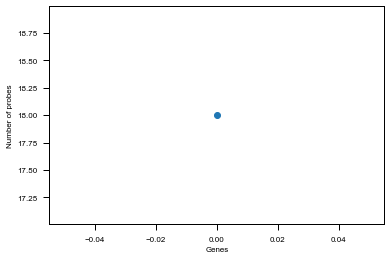

In [26]:
import glob,os
import numpy as np
from tqdm.notebook import tqdm
in_files = np.sort(glob.glob('GFPProbes/*.fasta'))
in_files = [fl for fl in in_files if 'auto' not in fl.lower()]
def read_probes(fl):
    pb_fl = fl.replace('.fasta','.csv')
    names,seqs = [],[]
    if os.path.exists(pb_fl):
        seqs,names = zip(*[ln.replace("b'",'').replace("'",'').split(',')[:2] for ln in open(pb_fl,'r')])
    return names,seqs
num_pbs = []
for fl in tqdm(in_files):
    names,seqs = read_probes(fl)
    num_pbs.append(len(names))
    
    
import matplotlib.pylab as plt
plt.figure()
plt.plot(num_pbs,'o-')
plt.ylabel('Number of probes')
plt.xlabel('Genes')

In [ ]:
import sys,os,glob
sys.path.append(os.path.abspath(r'LibraryDesign3'))
import LibraryTools as lt
import numpy as np
import LibraryDesigner as ld
import pickle
from tqdm import tqdm


In [ ]:
def get_pb_est(pbr_fl):
    """This reads the probe report from the LibraryDesigner and returns dictionaris with diagnostics"""
    pb_designer = ld.pb_reports_class()
    pb_designer.load_pbr(pbr_fl)
    pb_reports = pb_designer.pb_reports
    pb_reports_keep = pb_designer.pb_reports_keep


    dic_check = pb_designer.dic_check
    dic_fracs = {}
    for key_ch in dic_check:
        if type(key_ch) is tuple:
            k0,k1 = key_ch[0],key_ch[1]
            x0 = np.array([pb_reports[key][k0] for key in pb_reports.keys()])
            x1 = np.array([pb_reports[key][k1] for key in pb_reports.keys()])
            x=x0-x1
            y0 = np.array([pb_reports_keep[key][k0] for key in pb_reports_keep.keys()])
            y1 = np.array([pb_reports_keep[key][k1] for key in pb_reports_keep.keys()])
            y=y0-y1
            kp_nm = key_ch[0]
        else:
            x = np.array([pb_reports[key][key_ch] for key in pb_reports.keys()])
            y = np.array([pb_reports_keep[key][key_ch] for key in pb_reports_keep.keys()])
            kp_nm = key_ch
        check_val = dic_check[key_ch]
        if type(check_val) is list:
            keep = (x>np.min(check_val))&(x<np.max(check_val))
        else:
            if key_ch=='tm':
                keep = x>=check_val
            else:
                keep = x<=check_val
        dic_fracs[kp_nm] = np.sum(keep)/float(len(keep))

    pb_len = pb_designer.params_dic['pb_len']
    buffer_len = pb_designer.params_dic['buffer_len']
    len_sq = np.max([pb_reports[kpb]['pb_index'] for kpb in pb_reports])+pb_len+1
    n_max = int(len_sq/(pb_len+buffer_len))
    dic_fracs['actual'] = len(pb_reports_keep)/float(n_max)
    return dic_fracs



In [ ]:
import os,glob
from tqdm.notebook import tqdm
#pb_folders = [r'ProbesFurnari/Probes']
#pbr_files = [fl for pb_folder in pb_folders for fl in glob.glob(pb_folder+os.sep+'*.pbr')]
pbr_files = [fl.replace('.fasta','.pbr')for fl in in_files]
dics = [get_pb_est(pbr_fl) for pbr_fl in tqdm(pbr_files)]


In [ ]:
nprobes = []
for pbr_fl in pbr_files:
    name= os.path.basename(pbr_fl).split('_')[0]
    csv_fl = pbr_fl.replace('.pbr','.csv')
    if os.path.exists(csv_fl):
        npb = len([ln for ln in open(csv_fl,'r')][1:])
    else:
        npb=0
    print(name,npb)    
    nprobes.append(npb)

import matplotlib.pylab as plt
keys = dics[0].keys()
data_fracs = np.array([[dic[key] for dic in dics] for key in keys])
plt.figure(figsize=(10,5))
for data_,key in zip(data_fracs,keys):
    plt.plot(data_,'o-',label=key)
genes = [('***  ' if npb<20 else '') + os.path.basename(fl).split('_')[0]+' - '+str(npb)+' probes' 
         for fl,npb in zip(pbr_files,nprobes)]
plt.xticks(np.arange(len(genes)),genes,rotation='90')
plt.ylabel("Fraction of probes passed")
plt.legend()
plt.show()

### Finalize library

In [70]:
import numpy as np


txts = [ln.replace('\n','').split(',') for ln in open(r'G:\My Drive\RotationScriptsBA\readouts_primers\NDB_brightness2.csv','r') if len(ln)>2]
head = txts[0]
txts = np.array(txts)[1:]
ndbs_info = np.array([r for r1,r2,r3 in zip(txts[txts[:,1]=='750'],txts[txts[:,1]=='647'],txts[txts[:,1]=='561']) for r in [r1,r2,r3]])

pcr_primers = np.array([ln.replace('\n','').split(',') for ln in open(r'G:\My Drive\RotationScriptsBA\readouts_primers\PCR_primers - pcr.csv','r') if len(ln)>2][1:])

In [71]:

def read_target_seqs(fl):
    txts = np.array([ln.replace('\n','').split(',') for ln in open(fl,'r') if len(ln)>2][1:])
    seqs = np.array([txt.replace("'",'')[1:] for txt in txts[:,0]])
    names = txts[:,1]
    return names,seqs

In [114]:
import glob

files_ = np.sort(glob.glob(r'G:\My Drive\Ptbp1Probes\Probes\ptb*.csv'))

ndb_pairs = ndbs_info[:-3,0].reshape([-1,2,3]).swapaxes(-2,-1).reshape([-1,2])
ndb_dic = {nm:sq for nm,sq in ndbs_info[:,[0,-1]]}

iNDB = 0

lib_names = []
lib_seqs = []
final_primers_used = []


#get PCR primers

ipA,ipB = 6,3
primerAnm,primerBnm = pcr_primers[[ipA,ipB],0]
primerAnm = primerAnm.split('_')[0]
primerBnm = primerBnm.split('_')[0]
primerA,primerB=pcr_primers[[ipA,ipB],-1]
primerB = lt.seqrc(primerB[-20:])
tag_lib = 'PTB-RNA__'+primerAnm+'__'+primerBnm


for fl in files_:
    names,seqs = read_target_seqs(fl)
    if len(seqs)>5:
        names = names[:100]
        seqs = seqs[:100]
        ndb_nms = ndb_pairs[iNDB]
        ndb_sqs = [ndb_dic[nm] for nm in ndb_nms]
        for isq,(nm,sq) in enumerate(zip(names,seqs)):
            ndb_sq = ndb_sqs[isq%len(ndb_sqs)]
            ndb_nm = ndb_nms[isq%len(ndb_nms)]
            tag = tag_lib+'__'+ndb_nm+'__'
            sq_ = lt.up_down([primerA,ndb_sq,lt.seqrc(sq),ndb_sq,ndb_sq,primerB])
            nm_ = tag+nm
            lib_names.append(nm_)
            lib_seqs.append(sq_)
        iNDB+=1

files_ = np.sort(glob.glob(r'G:\My Drive\Ptbp1Probes\Probes\Ai*.csv'))
ipA,ipB = 10,5

primerAnm,primerBnm = pcr_primers[[ipA,ipB],0]
primerAnm = primerAnm.split('_')[0]
primerBnm = primerBnm.split('_')[0]
primerA,primerB=pcr_primers[[ipA,ipB],-1]
primerB = lt.seqrc(primerB[-20:])
tag_lib = 'tdTom-RNA__'+primerAnm+'__'+primerBnm

for fl in files_:
    names,seqs = read_target_seqs(fl)
    if len(seqs)>5:
        names = names[:100]
        seqs = seqs[:100]
        ndb_nms = ndb_pairs[iNDB]
        ndb_sqs = [ndb_dic[nm] for nm in ndb_nms]
        for isq,(nm,sq) in enumerate(zip(names,seqs)):
            ndb_sq = ndb_sqs[isq%len(ndb_sqs)]
            ndb_nm = ndb_nms[isq%len(ndb_nms)]
            tag = tag_lib+'__'+ndb_nm+'__'
            sq_ = lt.up_down([primerA,ndb_sq,lt.seqrc(sq),ndb_sq,ndb_sq,primerB])
            nm_ = tag+nm
            lib_names.append(nm_)
            lib_seqs.append(sq_)
        iNDB+=1

files_ = np.sort(glob.glob(r'G:\My Drive\Ptbp1Probes\Probes\chr*.csv'))
ipA,ipB = 14,7

primerAnm,primerBnm = pcr_primers[[ipA,ipB],0]
primerAnm = primerAnm.split('_')[0]
primerBnm = primerBnm.split('_')[0]
primerA,primerB=pcr_primers[[ipA,ipB],-1]
primerB = lt.seqrc(primerB[-20:])
tag_lib = 'chr-intr-RNA__'+primerAnm+'__'+primerBnm

for fl in files_:
    names,seqs = read_target_seqs(fl)
    if len(seqs)>5:
        names = names[:100]
        seqs = seqs[:100]
        ndb_nms = ndb_pairs[iNDB]
        ndb_sqs = [ndb_dic[nm] for nm in ndb_nms]
        for isq,(nm,sq) in enumerate(zip(names,seqs)):
            ndb_sq = ndb_sqs[isq%len(ndb_sqs)]
            ndb_nm = ndb_nms[isq%len(ndb_nms)]
            tag = tag_lib+'__'+ndb_nm+'__'
            sq_ = lt.up_down([primerA,ndb_sq,sq,ndb_sq,ndb_sq,primerB])#lt.seqrc(sq)
            nm_ = tag+nm
            lib_names.append(nm_)
            lib_seqs.append(sq_)
        iNDB+=1


In [120]:
lt.fastawrite(r'G:\My Drive\Ptbp1Probes\extra_probes_ptbp1-tdtom.fasta',lib_names,lib_seqs)

In [134]:
for nm,sq in zip(lib_names,lib_seqs):
    #print(nm)
    print(sq)

CGCAAACTGGTGCGGAAGGCatgccactcggatatttctaTTGGGCGGGACGGCCGTCAGTCAAGACGGAAGACGGAAACatgccactcggatatttctaATGCCACTCGGATATTTCTAgcgtggagggcatacaacgc
CGCAAACTGGTGCGGAAGGCgtctaaggacatcgacatatTTACTCCAAGGGCGAAACGCATCCAGACAGCAGACAGCTGgtctaaggacatcgacatatGTCTAAGGACATCGACATATgcgtggagggcatacaacgc
CGCAAACTGGTGCGGAAGGCatgccactcggatatttctaCCCCGCCTGCCCCCGCCAGGGCCTTCTATTGGTCAAAAGGatgccactcggatatttctaATGCCACTCGGATATTTCTAgcgtggagggcatacaacgc
CGCAAACTGGTGCGGAAGGCgtctaaggacatcgacatatATCCTCATTGGTTCCCGCTGCGGTCTGTGGGCGTGGTCAAgtctaaggacatcgacatatGTCTAAGGACATCGACATATgcgtggagggcatacaacgc
CGCAAACTGGTGCGGAAGGCatgccactcggatatttctaACCTAGATGGCGGAGACGCCCGCACACGTCCCCCGCGCGCatgccactcggatatttctaATGCCACTCGGATATTTCTAgcgtggagggcatacaacgc
CGCAAACTGGTGCGGAAGGCgtctaaggacatcgacatatGTGGTGAGCGGAGCGGCGTGCGAGGGGCGCGGCAGGACTTgtctaaggacatcgacatatGTCTAAGGACATCGACATATgcgtggagggcatacaacgc
CGCAAACTGGTGCGGAAGGCatgccactcggatatttctaGCCAAAAGTCCACGCGCGCGGCAGCGATGGCTGGGACGGAatgccactcggatatttctaATGCCACTCGGATATTTCTAgcgtggagggcatacaacgc
CGCAAACTGGTGC

In [127]:
sq =  'CTGCTGATGGCAGGCAAAGTGGCCTTGTTACCATTTACAA'
[nm_  for nm_,sq_ in zip(names_tr,seqs_tr) if lt.seqrc(sq) in sq_]

['ENSMUSG00000006498|ENSMUST00000165704;ENSMUST00000168988;ENSMUST00000165153;ENSMUST00000095457;ENSMUST00000057343;ENSMUST00000164385;ENSMUST00000099958;ENSMUST00000172282;ENSMUST00000168683;ENSMUST00000171216;ENSMUST00000169483;ENSMUST00000169091;ENSMUST00000168216;ENSMUST00000171599;ENSMUST00000169580;ENSMUST00000165724|Ptbp1|10|79690261|79700605|1']

In [130]:
np.unique([len(sq) for sq in lib_seqs],return_counts=True)

(array([140]), array([308], dtype=int64))

In [131]:
np.unique([sq[:20]+sq[-20:] for sq in lib_seqs],return_counts=True)

(array(['CGCAAACTGGTGCGGAAGGCgcgtggagggcatacaacgc',
        'GACATCCAGGCGCGGACAACgtcgatgcagcgcgaaaggg',
        'TTGCTAGCGTGGGCCAATCGcggtgcatttgcgggaagac'], dtype='<U40'),
 array([270,  18,  20], dtype=int64))

In [132]:
np.unique([sq[20:40] for sq in lib_seqs],return_counts=True)

(array(['acgcctctcatgtatcgcct', 'atcaacgtacccacaaagtc',
        'atgccactcggatatttcta', 'caaacgtgtaacagacgccc',
        'ccgagagtcaacgacagtca', 'gcctagcataacatgtcgca',
        'gtctaaggacatcgacatat', 'tcacatatccgaccgggatc',
        'tgtaccagtacgcagccgac', 'ttcggaaagtgacaaccacc'], dtype='<U20'),
 array([50, 10, 50, 35, 35, 50, 50, 10,  9,  9], dtype=int64))